# Extended Kalman Filter algorithm

Loan Sarazin & Anna Marizy

In [1]:
import numpy as np
import numpy.linalg as la
from math import *
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
#Importation des données 
data = pd.read_excel("donnee.xlsx")
print(data.head())

   Unnamed: 0     Temps  signalReel  signalBruite
0           0  0.000000    0.000000     -0.503936
1           1  0.005174    1.901397      4.727026
2           2  0.010348    3.517097      5.284031
3           3  0.015522    4.604329      3.413861
4           4  0.020695    4.999729      8.070117


In [16]:
signalReel = np.array(data.loc[:, ('signalReel')])
signalBruite = np.array(data.loc[:, ('signalBruite')])

Temps = np.array(data.loc[:, ('Temps')])

In [4]:
signalBruite.shape

(20000,)

[0.00000000e+00 5.17384106e-03 1.03476821e-02 ... 1.03461300e+02
 1.03466474e+02 1.03471647e+02]


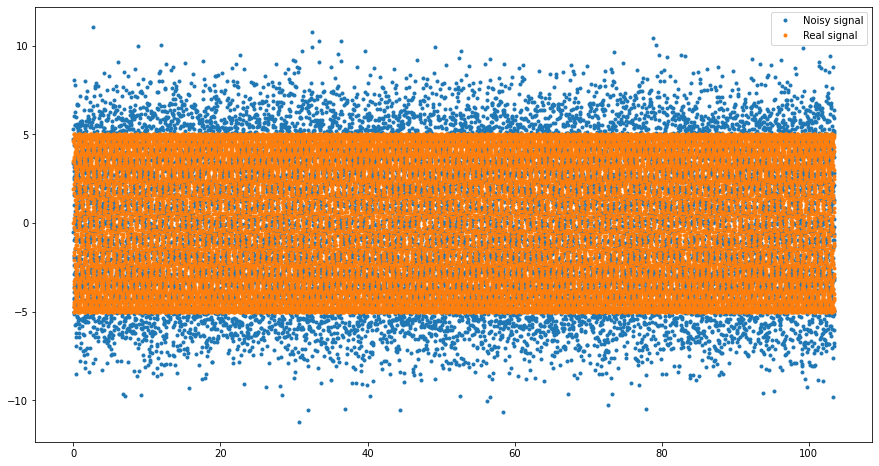

In [30]:
N = signalReel.shape[0]
X = Temps
print(X)

plt.figure(figsize = (15, 8))
plt.plot(X, signalBruite, '.', label = "Noisy signal")
plt.plot(X, signalReel, '.', label = "Real signal")
plt.legend()
plt.show()

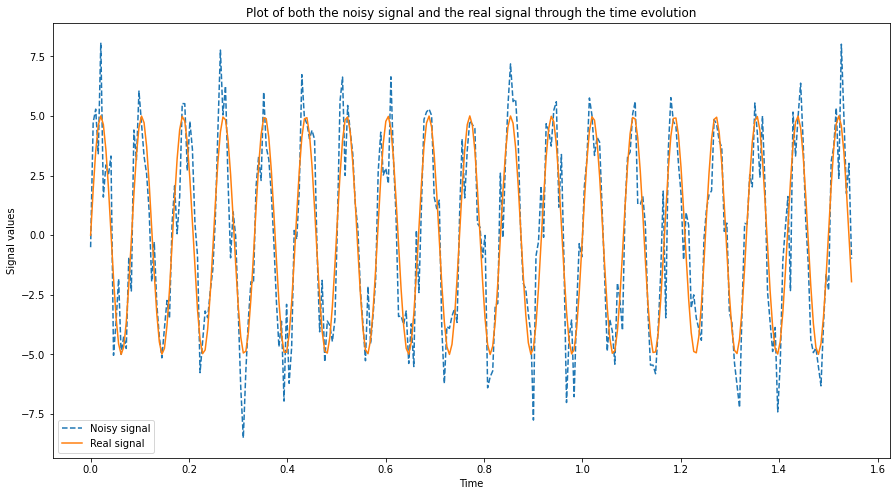

In [28]:
#restriction au 300 premières valeurs
plt.figure(figsize = (15, 8))
plt.plot(X[:300], signalBruite[:300], label = "Noisy signal", linestyle = "dashed")
plt.plot(X[:300], signalReel[:300], label = "Real signal")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Signal values")
plt.title("Plot of both the noisy signal and the real signal through the time evolution")

plt.show()

In [7]:
#Implémentation du filtre de Kalman étendu 

def KalmanF_extended(Z, Q, R, A):
    #Initialisation de x0 et P00
    x0 = np.random.normal(size = 2)
    P00 = np.identity(2)
    
    k=0
    x_evol = []
    
    nu0 = 12
    Te = 1/193.28
    
    x = x0
    P = P00
    N = Z.shape[0]
    
    #Boucle d'estimation/prediction
    while (k < N ):
        new_x = x.copy().reshape((2, 1))
    
        newP =  P + Q
        
        H = np.array([sin(2*pi*nu0*Te*(k+1) + new_x[1, 0]), new_x[0, 0]*cos(2*pi*nu0*Te*(k+1) + new_x[1, 0])]).reshape((2, 1))
        S = np.array(H.T@newP@H + R)
        K = (newP@H /S).reshape((2, 1))
        
        epsilon = Z[k] - new_x[0]*sin(2*pi*nu0*(k+1)*Te + new_x[1])
        x = new_x + epsilon*K
        P = newP - K@H.T@newP
        
        x_evol.append(x)
        k += 1
    return(np.array(x_evol))

In [12]:
Q = np.array([2*10**(-5), 0, 0, 2*10**(-1)])
Q = Q.reshape((2, 2))

R = 3

A = np.eye(2)

Q, R, A

x_estim = KalmanF_extended(signalBruite, Q, R, A)

In [13]:
x_estim = x_estim.reshape((20000, 2))

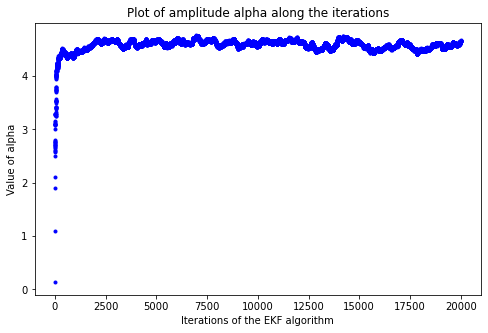

In [19]:
plt.figure(figsize = (8, 5))
iter = np.arange(0, 20000)
plt.plot(iter, x_estim[:, 0], 'b.')
plt.xlabel("Iterations of the EKF algorithm")
plt.ylabel("Value of alpha")
plt.title("Plot of amplitude alpha along the iterations")
plt.show()

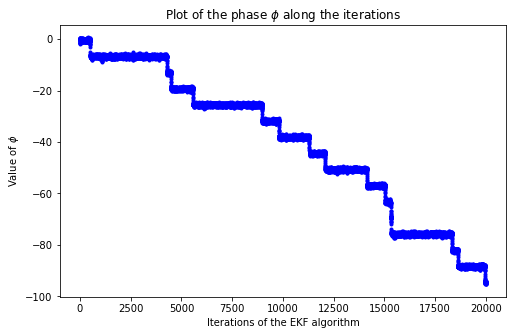

In [22]:
plt.figure(figsize = (8, 5))
iter = np.arange(0, 20000)
plt.plot(iter, x_estim[:, 1], 'b.')
plt.xlabel("Iterations of the EKF algorithm")
plt.ylabel("Value of $\phi$")
plt.title("Plot of the phase $\phi$ along the iterations")
plt.show()

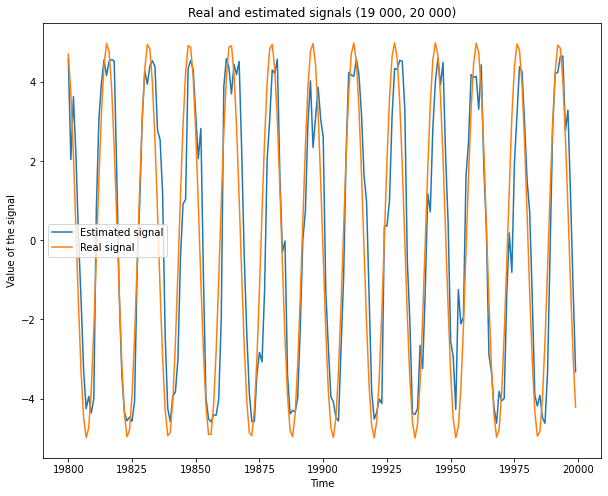

In [32]:
nu0 = 12
Te = 1/193.28

plt.figure(figsize = (10, 8))
iter = np.arange(19800, 20000)
plt.plot(iter, x_estim[19800:, 0]*np.sin(2*pi*nu0*(iter)*Te + x_estim[19800:, 1]), label = "Estimated signal")
plt.plot(iter, signalReel[19800:], label = "Real signal")
plt.xlabel("Time")
plt.ylabel("Value of the signal")
plt.title("Real and estimated signals (19 000, 20 000)")
plt.legend()
plt.show()

We can see that we have a quite accurate estimation of the signal. The amplitude alpha is converging, as expected, to the value 5 and the phase $\phi$ is also close to the real phase. 

Note that the plot is for the last periods, we can see below that the estimated signal is less accurate at the beginning of the time period. 

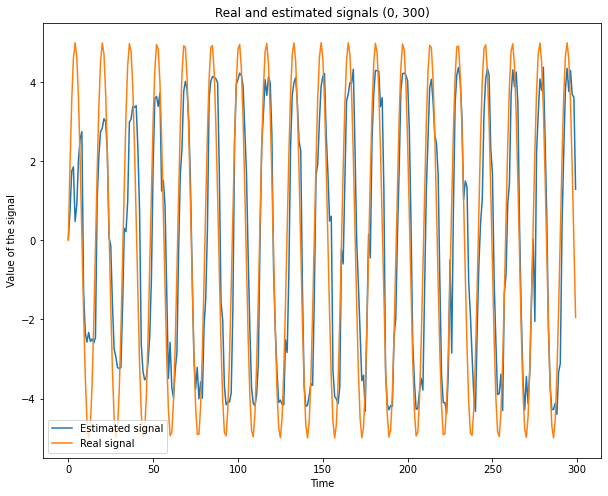

In [33]:
plt.figure(figsize = (10, 8))
iter = np.arange(0, 300)
plt.plot(iter, x_estim[0:300, 0]*np.sin(2*pi*nu0*(iter)*Te + x_estim[0:300, 1]), label = "Estimated signal")
plt.plot(iter, signalReel[0:300], label = "Real signal")
plt.xlabel("Time")
plt.ylabel("Value of the signal")
plt.title("Real and estimated signals (0, 300)")
plt.legend()
plt.show()

The estimated signal is less accurate over the 100 first time values. We can consider this result as the fact that the algorithm need a kind of "warming up" before producing the most accurate values it can provide.

We have the same result on the plot of the evolution of $\alpha $ and $\phi$ on the previous plots. The value of the real signal is obtained some "warming up" time. 